In [44]:
import numpy as np
from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipBackend
from pulser.devices import MockDevice
from pulser.waveforms import RampWaveform, ConstantWaveform, InterpolatedWaveform

import matplotlib.pyplot as plt
import qutip

## Dynamics with omega=0

## do a simulation starting from negative detuning, and ramping up the detuning to a positive value (something like from -20 to +20 rad/us). Keep omega=0 at all times. sample the final state

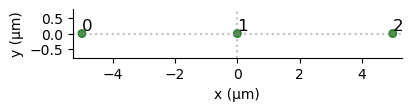

In [23]:
coordinates = [(0,0), (5,0), (10,0)]
reg = Register.from_coordinates(coordinates)
reg.draw()

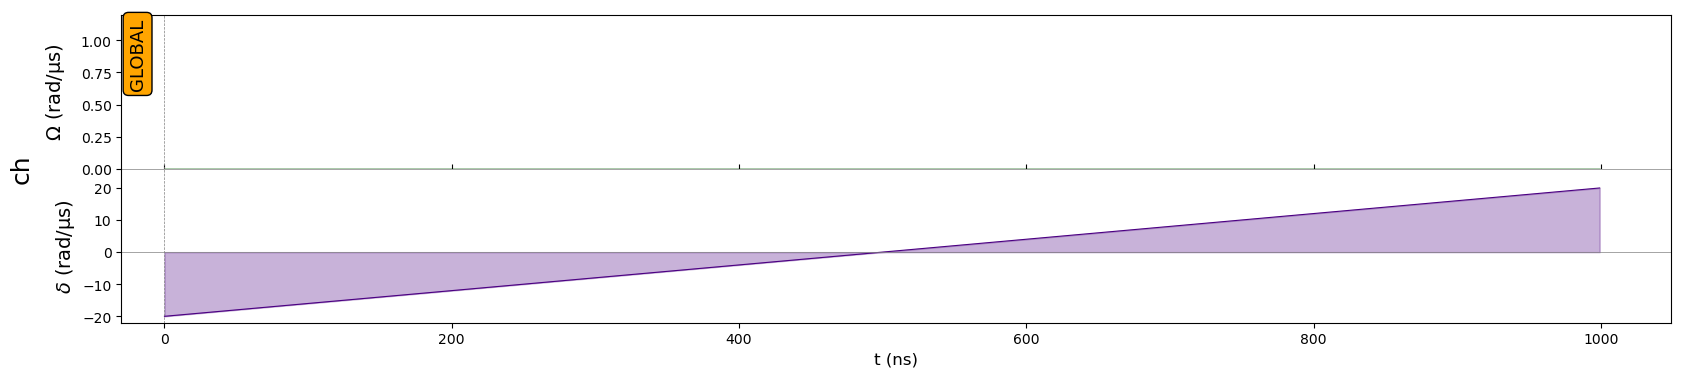

In [34]:
seq = Sequence(reg, MockDevice)

seq.declare_channel('ch', 'rydberg_global')

det_wf = RampWaveform(
    duration=1000,
    start=-20,
    stop=20
)
pulse = Pulse.ConstantAmplitude(
    amplitude=0,
    detuning=det_wf,
    phase=0
)

seq.add(pulse, "ch")
seq.draw()

In [35]:
sim = QutipBackend(seq)
results = sim.run()

In [36]:
results.sample_final_state(1000)

Counter({'000': 1000})

## Now do the same but turning on the amplitude as well

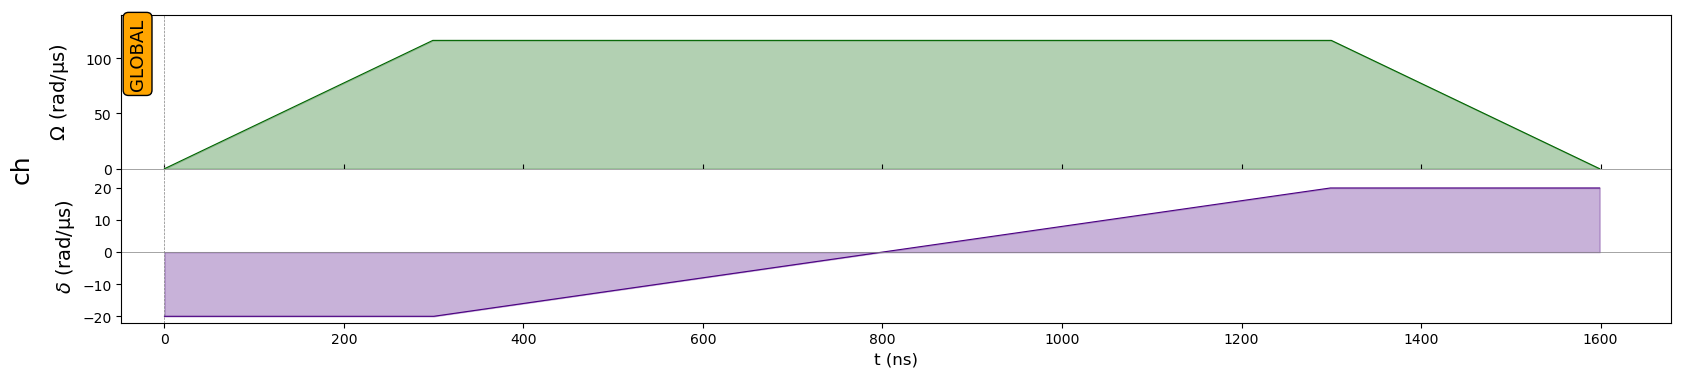

In [49]:
seq = Sequence(reg, MockDevice)
omega = MockDevice.rabi_from_blockade(6)

seq.declare_channel('ch', 'rydberg_global')

#first part
omega_wf_1 = RampWaveform(300, 0, omega)
delta_wf_1 = ConstantWaveform(300, -20)
pulse_1 = Pulse(omega_wf_1, delta_wf_1, 0)
seq.add(pulse_1, 'ch')

#second part
omega_wf_2 = ConstantWaveform(1000, omega)
delta_wf_2 = RampWaveform(1000, -20, 20)
pulse_2 = Pulse(omega_wf_2, delta_wf_2, 0)
seq.add(pulse_2, 'ch')

#third part
omega_wf_3 = RampWaveform(300, omega, 0)
delta_wf_3 = ConstantWaveform(300, 20)
pulse_3 = Pulse(omega_wf_3, delta_wf_3, 0)
seq.add(pulse_3, 'ch')


seq.draw()

In [50]:
sim = QutipBackend(seq)
results = sim.run()
results.sample_final_state(1000)

Counter({'000': 14, '001': 85, '010': 197, '100': 73, '101': 631})

## Note: the shape of the adiabatic pulse does not matter, only thing that matters is the initial and final point

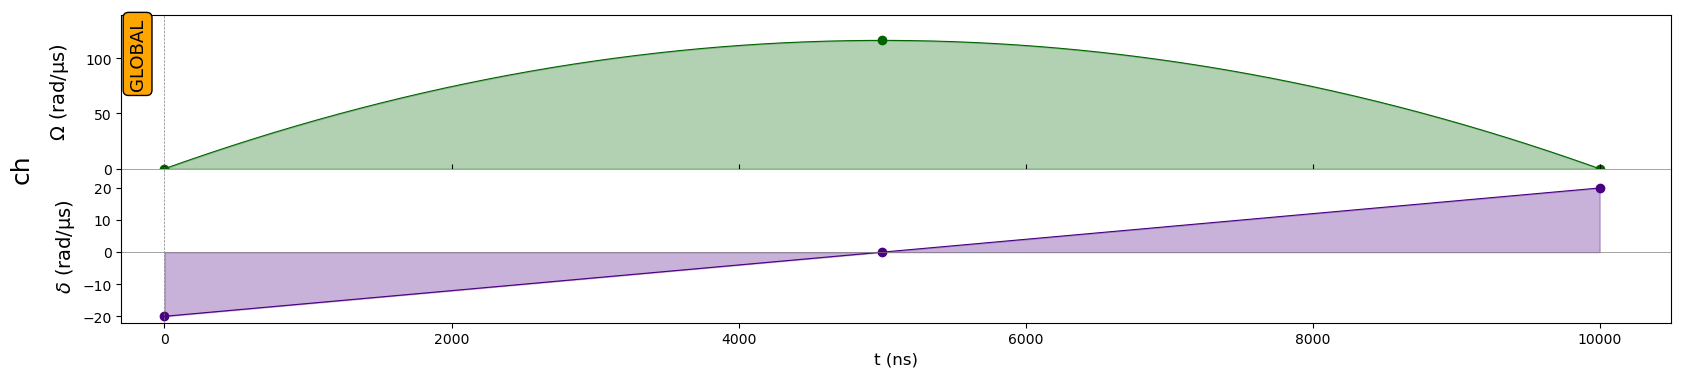

In [46]:
# let's try another shape with the same initial and final point

seq = Sequence(reg, MockDevice)
omega = MockDevice.rabi_from_blockade(6)

seq.declare_channel('ch', 'rydberg_global')

omega_wf = InterpolatedWaveform(10000, [0, omega, 0])
delta_wf = InterpolatedWaveform(10000, [-20, 0, 20])
pulse = Pulse(omega_wf, delta_wf, 0)

seq.add(pulse, 'ch')

seq.draw()

In [47]:
sim = QutipBackend(seq)
results = sim.run()
results.sample_final_state(1000)

Counter({'001': 21, '010': 1, '100': 25, '101': 953})